In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Load dataset
df = pd.read_csv('/content/station_data_dataverse.csv')

# Handle missing values
df['distance'] = df['distance'].fillna(df['distance'].mean())

# Encode categorical variables
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])

# Define features and target
X = df[
    ['chargeTimeHrs', 'startTime', 'endTime', 'weekday', 'managerVehicle', 'distance'] +
    ['userId', 'stationId', 'locationId']
]
y = df['kwhTotal']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'max_depth': 6,
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=1
)

# Predict on the test set
y_pred = model.predict(dtest)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Avoid division by zero for MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-10, y_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test_safe)) * 100

# Print the results
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape, "%")


[0]	train-rmse:2.67815	test-rmse:2.91583
[1]	train-rmse:2.56817	test-rmse:2.79374
[2]	train-rmse:2.44389	test-rmse:2.65087
[3]	train-rmse:2.33571	test-rmse:2.52682
[4]	train-rmse:2.24266	test-rmse:2.41883
[5]	train-rmse:2.15107	test-rmse:2.32042
[6]	train-rmse:2.07721	test-rmse:2.24593
[7]	train-rmse:2.02227	test-rmse:2.18958
[8]	train-rmse:1.96212	test-rmse:2.12810
[9]	train-rmse:1.91869	test-rmse:2.07834
[10]	train-rmse:1.86338	test-rmse:2.02018
[11]	train-rmse:1.81769	test-rmse:1.95425
[12]	train-rmse:1.77805	test-rmse:1.89244
[13]	train-rmse:1.74673	test-rmse:1.84566
[14]	train-rmse:1.71472	test-rmse:1.80838
[15]	train-rmse:1.69610	test-rmse:1.79026
[16]	train-rmse:1.66979	test-rmse:1.75543
[17]	train-rmse:1.64381	test-rmse:1.71899
[18]	train-rmse:1.62551	test-rmse:1.69691
[19]	train-rmse:1.60335	test-rmse:1.66781
[20]	train-rmse:1.59002	test-rmse:1.65796
[21]	train-rmse:1.56635	test-rmse:1.63793
[22]	train-rmse:1.54878	test-rmse:1.62055
[23]	train-rmse:1.53350	test-rmse:1.60214
[2

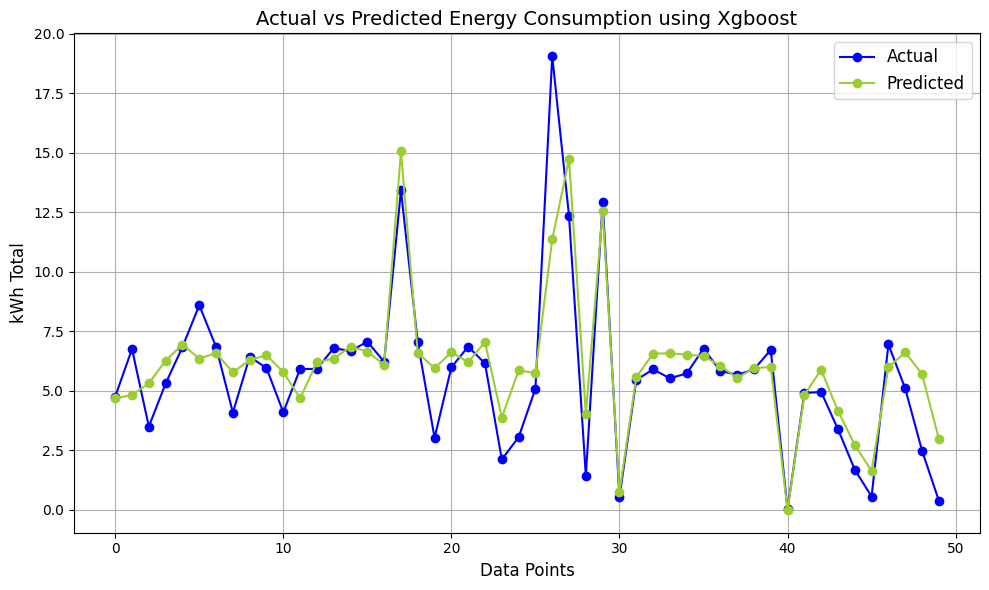

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_pred[:50], label="Predicted", color="yellowgreen", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumption using Xgboost", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()